<a href="https://colab.research.google.com/github/kuo8129/GenAI/blob/main/20250415HW_AI%E4%BB%A3%E7%90%86%E8%A8%AD%E8%A8%88%E6%A8%A1%E5%BC%8FReflection/20250415HW_AI%E4%BB%A3%E7%90%86%E8%A8%AD%E8%A8%88%E6%A8%A1%E5%BC%8FReflection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 讀入 API key

In [1]:
import os
from google.colab import userdata

In [2]:
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key

# 使用 aisuite 套件

In [3]:
!pip install aisuite[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.10.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.


In [4]:
import aisuite as ai

In [5]:
provider_writer = "groq"
model_writer="llama3-70b-8192"

provider_reviewer = "groq"
model_reviewer = "llama3-70b-8192"

In [6]:
def reply(system="請用台灣習慣的中文回覆。",
          prompt="你好",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]

    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

# 定義兩個 Agent 的 system prompt

In [7]:
system_writer = """你是一位擅長編寫故事的創作者，請你根據使用者提供的故事構想或開頭，編寫一段500字的故事大綱。
請將所有文字翻譯成繁體中文後直接輸出故事大綱，無需解釋或額外說明。
"""

system_reviewer = """你是一位專業、細心的寫作顧問，專門協助創作者潤飾故事。請你根據以下故事大綱，提供清楚且具建設性的回饋。
請參考以下寫作要點，以繁體中文給予回饋和建議：
1. 故事架構：故事是否敘述清楚？有起承轉合？前後連貫？
2. 角色描述：角色是否有特點？動機是否合理？
3. 文句表達：語句是否流暢？是否有錯字需修改？
請將所有文字翻譯成繁體中文後再輸出回饋與建議。
"""

In [8]:
def reflect_post(prompt):
    # Step 1: Writer 初稿
    first_version = reply(system_writer, prompt,
                          provider=provider_writer,
                          model=model_writer
                          )

    # Step 2: Reviewer 給建議
    suggestion = reply(system_reviewer, first_version,
                       provider=provider_reviewer,
                       model=model_reviewer
                       )

    # Step 3: Writer 根據建議再寫一次
    second_prompt = f"這是我剛剛寫的貼文：\n{first_version}\n\n這是修改建議：\n{suggestion}\n\n請根據這些建議，幫我改得更生活化、更自然。"
    second_version = reply(system_writer, second_prompt,
                           provider=provider_writer,
                           model=model_reviewer
                           )

    return first_version, suggestion, second_version

# 用 Gradio 打造對話機器人 Web App

In [9]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [10]:
import gradio as gr

In [11]:
with gr.Blocks() as demo:
    gr.Markdown("### 🤖 故事創作小幫手（Reflection Agent）")

    with gr.Row():
        out1 = gr.Textbox(label="🌟 第一版故事草稿")
        out2 = gr.Textbox(label="🧐 修改建議")
        out3 = gr.Textbox(label="✨ 第二版故事")

    user_input = gr.Textbox(label="請輸入您想撰寫的故事主題、構想或開頭")
    btn = gr.Button("故事內容 & 修正建議")

    btn.click(reflect_post, inputs=[user_input], outputs=[out1, out2, out3])

In [12]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://26dbb8c2322295a7db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://26dbb8c2322295a7db.gradio.live


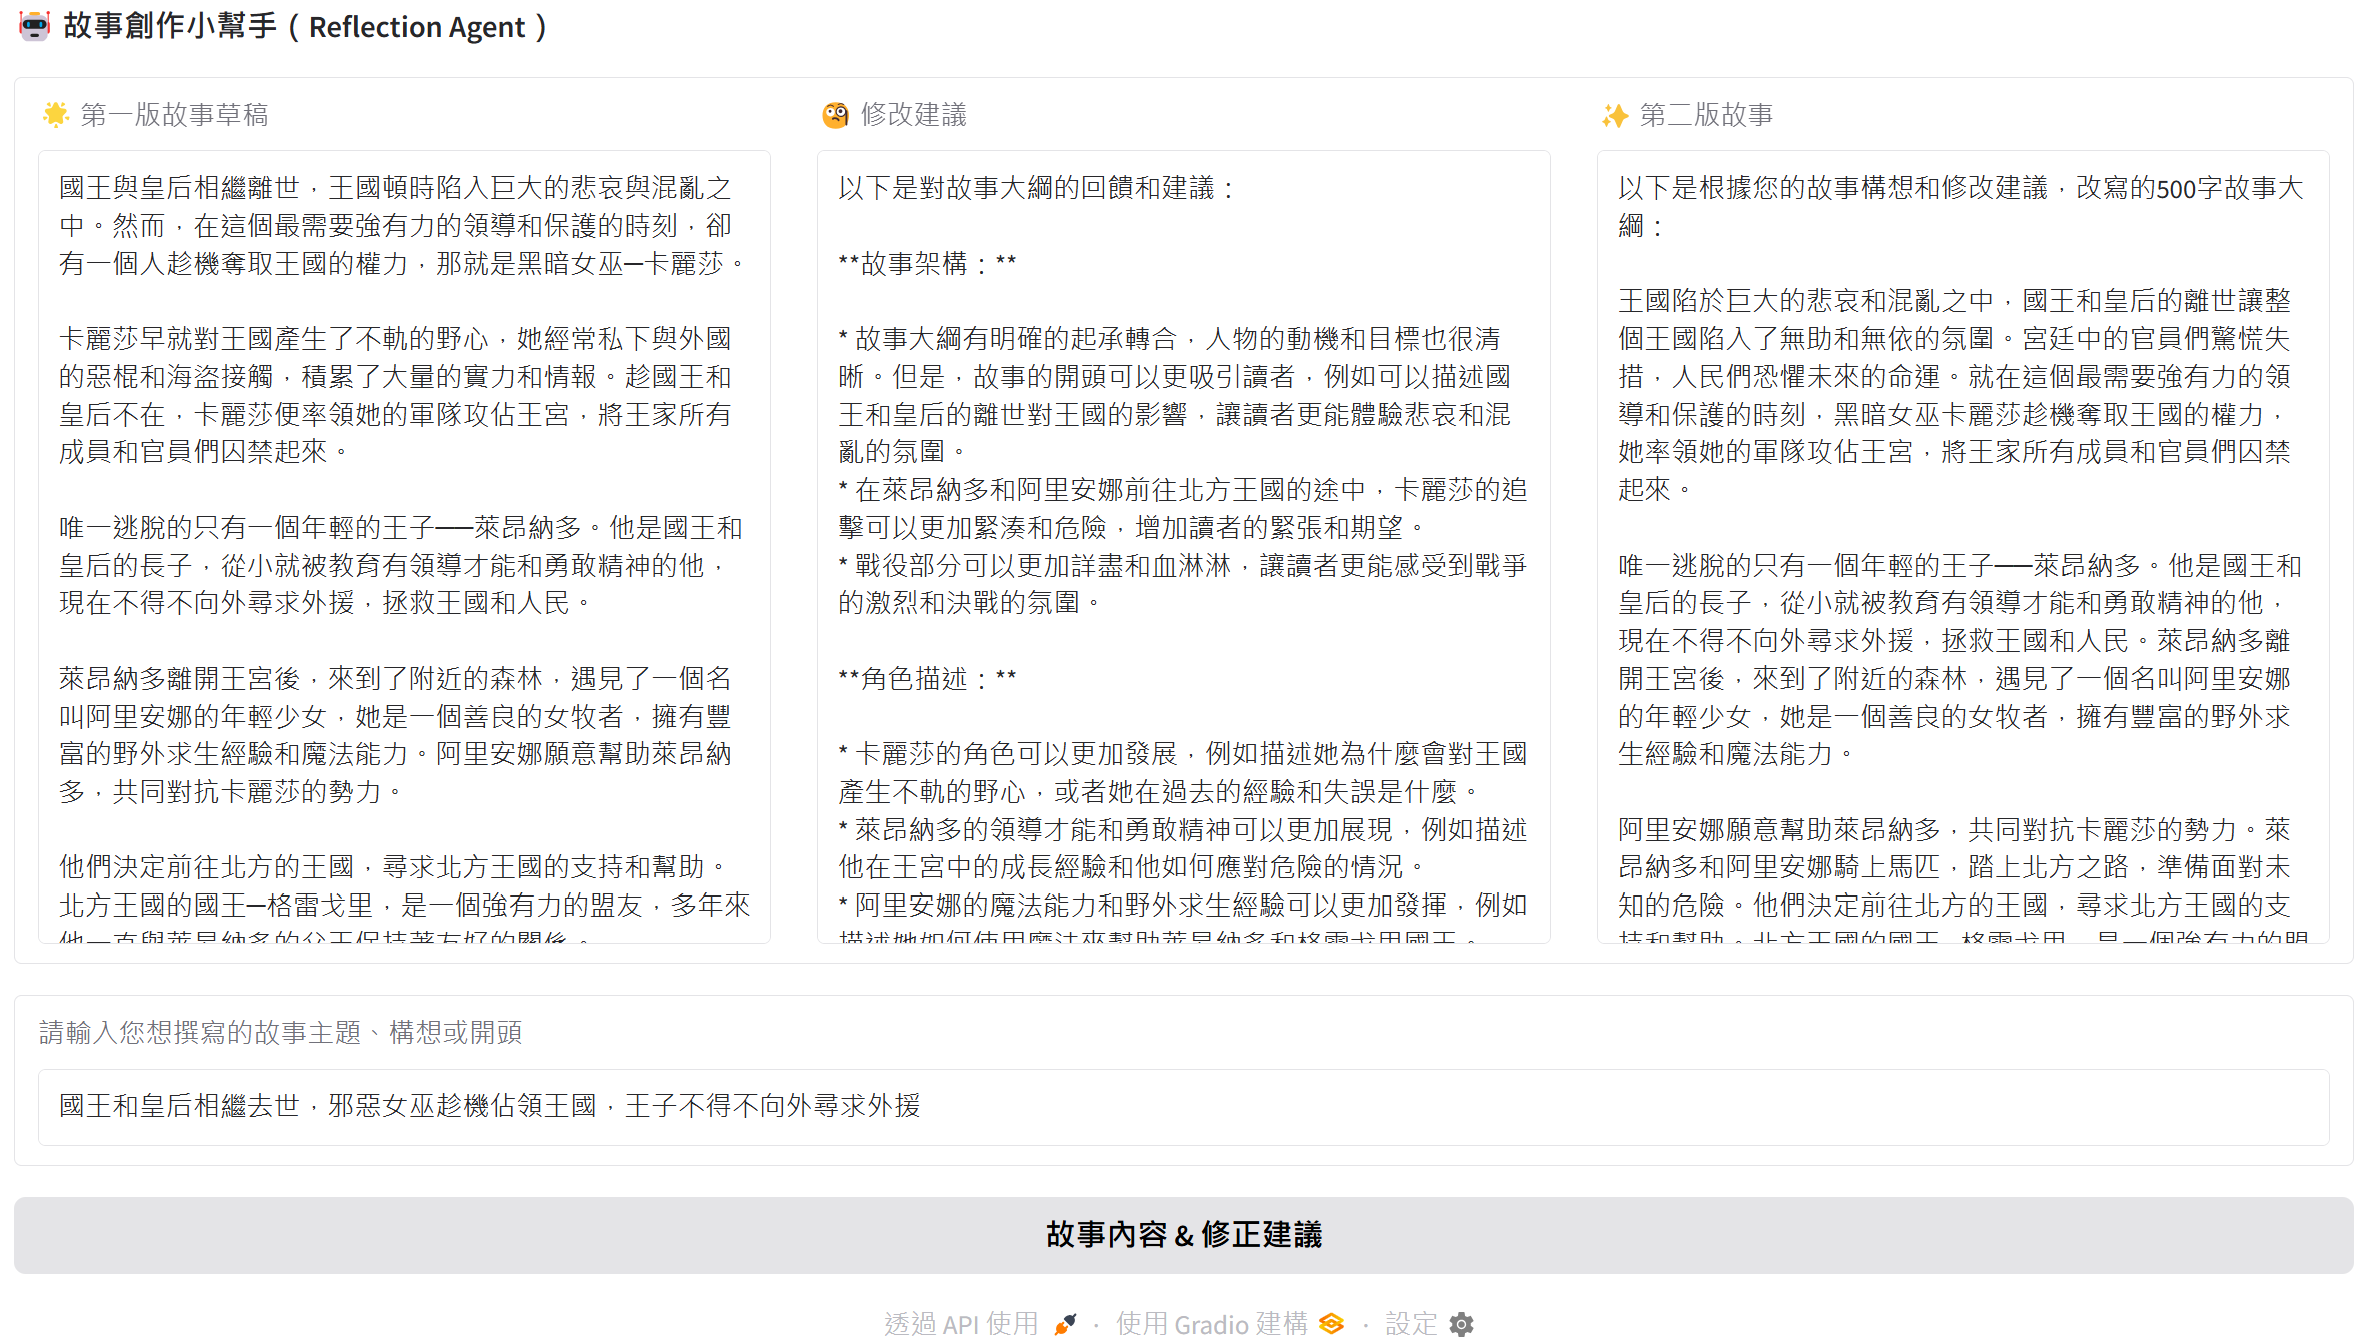

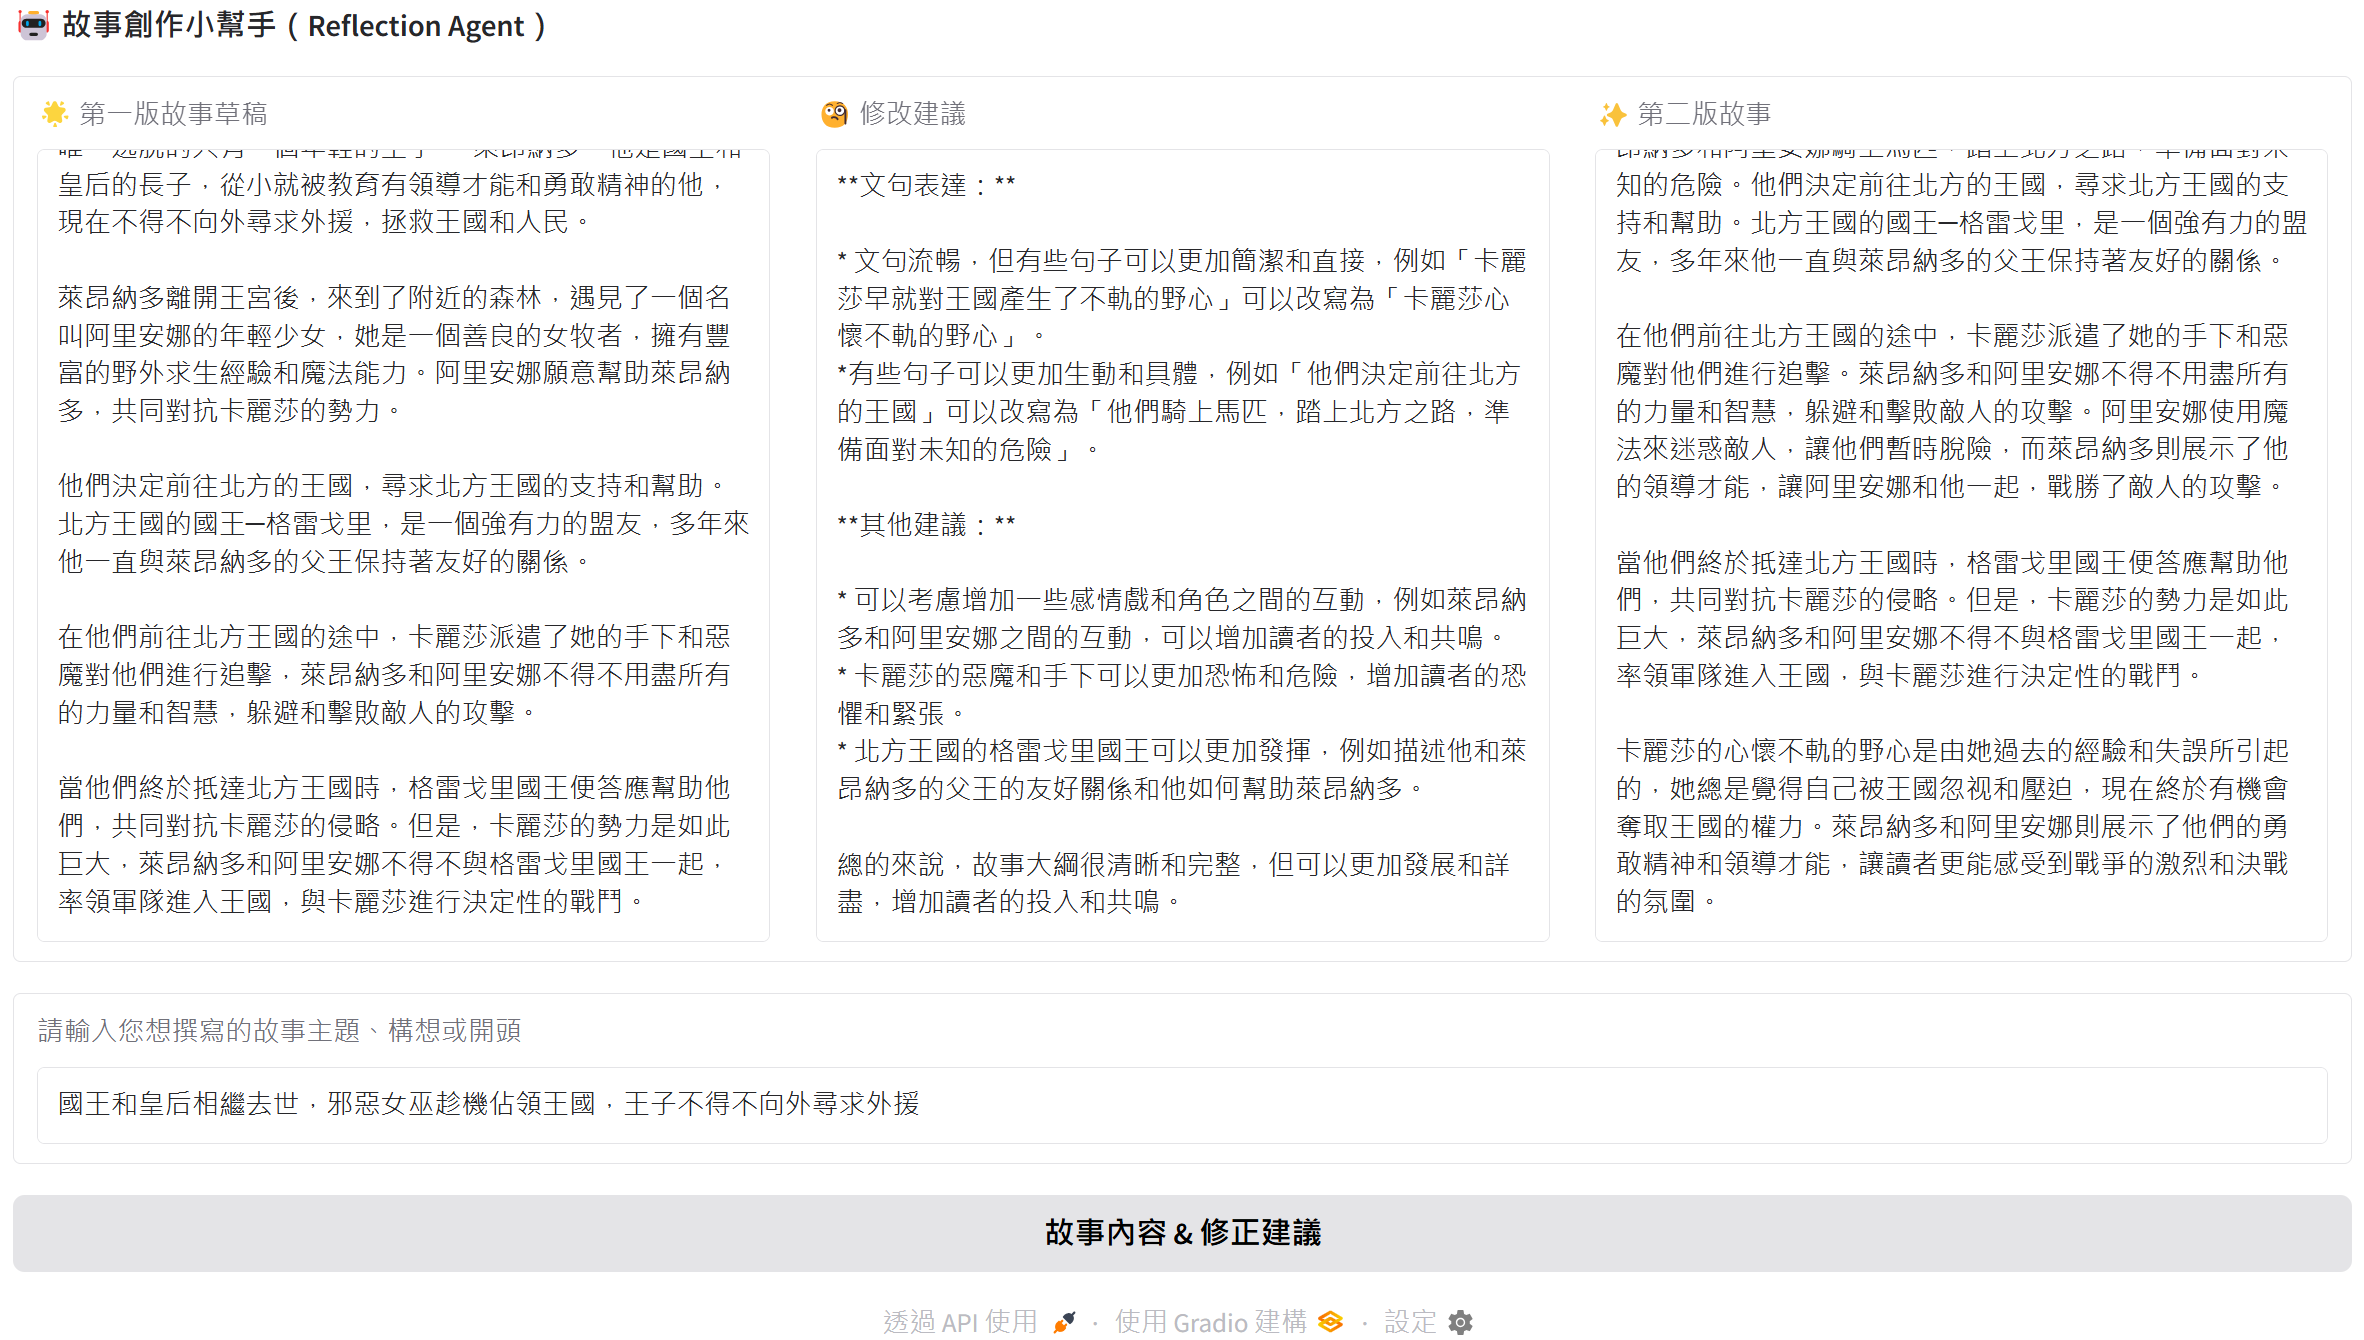